In [2]:
pip install tensorflow

  Using cached tensorflow-2.5.0-cp38-cp38-manylinux2010_x86_64.whl (454.4 MB)
  Using cached numpy-1.19.5-cp38-cp38-manylinux2010_x86_64.whl (14.9 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached grpcio-1.34.1-cp38-cp38-manylinux2014_x86_64.whl (4.0 MB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached h5py-3.1.0-cp38-cp38-manylinux1_x86_64.whl (4.4 MB)
  Using cached tensorboard_data_server-0.6.1-py3-none-manylinux2010_x86_64.whl (4.9 MB)
ERROR: stable-baselines3 1.0 requires gym>=0.17, which is not installed.
ERROR: launchpadlib 1.10.13 requires testresources, which is not installed.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.0
    Uninstall

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
import tensorflow as tf
from numpy.random import seed
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import pydot
import seaborn as sb

from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [2]:
exams_path = "/home/sebastian/Descargas/tesis/all.csv"
eeg_dataset = pd.read_csv(exams_path, error_bad_lines=False)
eeg_dataset.head()

,delta,tetha,alpha,beta,gamma,class
0,0.190776,0.058923,0.129363,0.029849,0.012989,1
1,0.182318,0.095967,0.110752,0.049693,0.046891,1
2,0.183269,0.079512,0.116541,0.048885,0.049781,1
3,0.351450,0.066773,0.072149,0.030012,0.021886,1
4,0.242536,0.101548,0.174173,0.047890,0.026310,1


In [3]:
X = eeg_dataset.iloc[:,0:5].values
y = eeg_dataset.iloc[:,5].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [4]:
seed(1)
tf.random.set_seed(1)

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=5))
model.add(Dense(64, activation='relu', name='layer3'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0058, rho=0.95)
model.compile(loss='mse', optimizer=rmsprop, metrics=['accuracy', 'mse',tf.keras.metrics.Precision()])
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=1000, batch_size=128, workers=5)

Epoch 1/1000
5/5 [==============================] - 8s 117ms/step - loss: 0.2662 - accuracy: 0.4950 - mse: 0.2662 - precision: 0.5226 - val_loss: 0.2505 - val_accuracy: 0.4802 - val_mse: 0.2505 - val_precision: 0.4798
Epoch 2/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.2485 - accuracy: 0.5509 - mse: 0.2485 - precision: 0.5032 - val_loss: 0.2499 - val_accuracy: 0.4802 - val_mse: 0.2499 - val_precision: 0.5021
Epoch 3/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.2462 - accuracy: 0.5095 - mse: 0.2462 - precision: 0.5044 - val_loss: 0.2487 - val_accuracy: 0.5595 - val_mse: 0.2487 - val_precision: 0.5061
Epoch 4/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.2442 - accuracy: 0.5756 - mse: 0.2442 - precision: 0.5117 - val_loss: 0.2467 - val_accuracy: 0.6944 - val_mse: 0.2467 - val_precision: 0.5256
Epoch 5/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.2388 - accuracy: 0.6440 - mse: 0.2388 - precision: 0.5368 - 

In [7]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")

In [8]:
y_pred

array([[1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
    

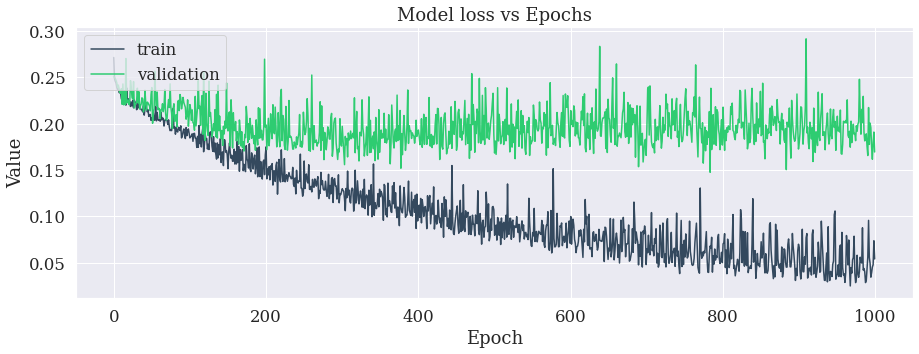

In [11]:
sb.set(font_scale=1.5)
sb.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

legend_labels = ['train', 'validation']
axes.plot(history.history['mse'], color='#34495e', label='train')
axes.plot(history.history['val_mse'], color='#2ecc71', label='validation')
axes.set_title('Model loss vs Epochs')
axes.set_xlabel('Epoch')
axes.set_ylabel('Value')
axes.legend(legend_labels, loc='upper left')
plt.setp(axes.get_legend().get_title(),fontsize=20)
plt.show()

In [12]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 99,  32],
       [ 20, 101]])

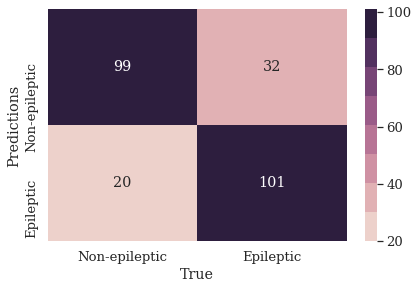

In [13]:
sb.set(rc={'figure.figsize':(6.7,4.27)},style='whitegrid',font_scale=1.2,palette=sb.cubehelix_palette(8))
sb.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
columns = ['Non-epileptic','Epileptic']
df_cm = pd.DataFrame(confusion_matrix, index=columns, columns=columns)

grafica = sb.heatmap(df_cm,cmap=sb.cubehelix_palette(8),annot=True,fmt='g')
plt.ylabel('True positives')
plt.xlabel('Predictions')
grafica.set(xlabel='True',ylabel='Predictions')
plt.show()

In [14]:
own_mets = (y_test, y_pred)
acc = metrics.accuracy_score(*own_mets)
recall = metrics.recall_score(*own_mets)
f1_score = metrics.f1_score(*own_mets)
precision = metrics.precision_score(*own_mets)

In [15]:
print(f"Accuracy: {acc} \nRecall: {recall} \nF1 Score: {f1_score} \nPrecision: {precision}")

Accuracy: 0.7936507936507936 
Recall: 0.8347107438016529 
F1 Score: 0.7952755905511811 
Precision: 0.7593984962406015
